In [25]:
%matplotlib inline
import torch
import numpy as np

In [26]:
x = torch.Tensor(5, 3)
print(x)


1.00000e-29 *
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0000  0.0000
  0.0000  0.0014  0.0000
  0.0000  0.0000  7.5363
[torch.FloatTensor of size 5x3]



In [27]:
x = torch.rand(5, 3)
print(x)


 0.2426  0.2568  0.6569
 0.6715  0.8447  0.6482
 0.4187  0.5795  0.6117
 0.0971  0.8335  0.6637
 0.2350  0.2830  0.5419
[torch.FloatTensor of size 5x3]



In [28]:
print(x.size())

torch.Size([5, 3])


In [29]:
y = torch.rand(5, 3)

In [30]:
print(x + y)


 0.6647  1.2284  0.9529
 0.9460  1.7531  1.3571
 0.7484  0.7094  1.4320
 0.4638  1.0283  1.2957
 1.0020  1.1418  0.7550
[torch.FloatTensor of size 5x3]



In [31]:
print(torch.add(x, y))


 0.6647  1.2284  0.9529
 0.9460  1.7531  1.3571
 0.7484  0.7094  1.4320
 0.4638  1.0283  1.2957
 1.0020  1.1418  0.7550
[torch.FloatTensor of size 5x3]



In [32]:
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)
print(result)


 0.6647  1.2284  0.9529
 0.9460  1.7531  1.3571
 0.7484  0.7094  1.4320
 0.4638  1.0283  1.2957
 1.0020  1.1418  0.7550
[torch.FloatTensor of size 5x3]



In [33]:
y.add_(x)
print(y)


 0.6647  1.2284  0.9529
 0.9460  1.7531  1.3571
 0.7484  0.7094  1.4320
 0.4638  1.0283  1.2957
 1.0020  1.1418  0.7550
[torch.FloatTensor of size 5x3]



In [34]:
print(x[:, 1])


 0.2568
 0.8447
 0.5795
 0.8335
 0.2830
[torch.FloatTensor of size 5]



In [35]:
a = torch.ones(5)
print(a)


 1
 1
 1
 1
 1
[torch.FloatTensor of size 5]



In [36]:
b = a.numpy()
print(b)

[ 1.  1.  1.  1.  1.]


In [37]:
a.add_(1)
print(a)
print(b)


 2
 2
 2
 2
 2
[torch.FloatTensor of size 5]

[ 2.  2.  2.  2.  2.]


In [38]:
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[ 2.  2.  2.  2.  2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



In [39]:
torch.cuda.is_available()

False

In [40]:
import torch
from torch.autograd import Variable

In [41]:
x = Variable(torch.ones(2, 2), requires_grad=True)

In [42]:
x

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [43]:
y = x + 2
print(y)

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [44]:
y.creator

In [45]:
z = y * y * 3
out = z.mean()

In [46]:
out.backward()

In [47]:
x.grad

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]

In [48]:
x = torch.randn(3)
x = Variable(x, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

Variable containing:
 -398.1550
  533.2480
 1336.9025
[torch.FloatTensor of size 3]



In [49]:
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)
print(x.grad)

Variable containing:
  102.4000
 1024.0000
    0.1024
[torch.FloatTensor of size 3]



In [60]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)  # 1 input channel, 6 output channels, 5x5 kernel
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        print("***", type(x))
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # batch以外の次元を取得
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
print(net)

Net (
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)


In [61]:
# view()はnumpyのreshape()と同じ
import torch
a = torch.ones((5, 5))
print(a.size())
a = a.view(-1, 25)
print(a.size())

torch.Size([5, 5])
torch.Size([1, 25])


In [62]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1のW

10
torch.Size([6, 1, 5, 5])


In [63]:
input = Variable(torch.randn(1, 1, 32, 32))
out = net(input)
print(out)

*** <class 'torch.autograd.variable.Variable'>
Variable containing:
-0.0296 -0.0503 -0.0858  0.0525  0.0885 -0.0887  0.0848  0.0286 -0.1114 -0.0267
[torch.FloatTensor of size 1x10]



In [54]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [55]:
output = net(input)
target = Variable(torch.arange(1, 11))
criterion = nn.MSELoss()

In [56]:
loss = criterion(output, target)
print(loss)

Variable containing:
 38.8627
[torch.FloatTensor of size 1]



In [57]:
net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

conv1.bias.grad after backward
Variable containing:
-0.1455
-0.0504
 0.1191
 0.1667
 0.0067
-0.0018
[torch.FloatTensor of size 6]



In [58]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [59]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.01)

optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()  # update paramters!

## CIFAR-10

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     # [0, 1] => [-1, 1]
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

In [3]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

Files already downloaded and verified


In [4]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

Files already downloaded and verified


In [5]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

torch.Size([4, 3, 32, 32]) torch.Size([4])
 deer plane   dog   dog


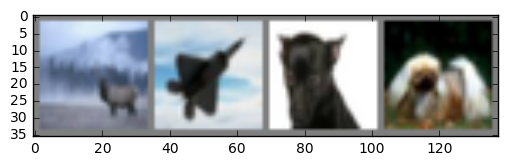

In [7]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.size(), labels.size())

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [8]:
# Define a CNN
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)  # パラメータがないレイヤもOK？
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # softmaxは含めない
        return x

net = Net()

In [9]:
net

Net (
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)

In [10]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [11]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data  # minibatch
        
        # データはVariableで囲む
        inputs, labels = Variable(inputs), Variable(labels)
        
        # 各ミニバッチごとに蓄積した勾配はリセットする
        # ミニバッチ単位でパラメータ更新するため
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]
        if i % 2000 == 1999:  # 2000 minibatchごとに表示
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.193
[1,  4000] loss: 1.868
[1,  6000] loss: 1.677
[1,  8000] loss: 1.586
[1, 10000] loss: 1.521
[1, 12000] loss: 1.445
[2,  2000] loss: 1.389
[2,  4000] loss: 1.378
[2,  6000] loss: 1.336
[2,  8000] loss: 1.324
[2, 10000] loss: 1.304
[2, 12000] loss: 1.280
Finished Training


Ground Truth:   cat  ship  ship plane


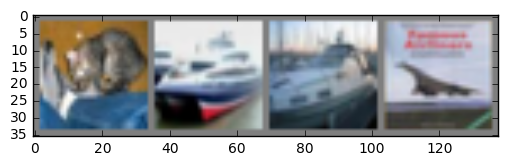

In [44]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('Ground Truth:', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [45]:
outputs = net(Variable(images))

In [46]:
outputs

Variable containing:
-1.2508 -1.2874  0.7634  1.2046  0.7051  1.1423  2.6231 -1.3018 -0.9248 -0.7266
 7.6949  6.5336 -1.4433 -4.2066 -1.4501 -4.7106 -5.0398 -3.2312  4.5732  4.0113
 2.5954  2.5191 -0.2919 -0.8724 -1.0442 -1.9091 -2.5280 -0.9194  2.2443  2.2276
 5.0382 -0.4052  0.6276 -1.6638  1.1080 -2.7642 -3.1777 -1.6432  2.4362  0.5359
[torch.FloatTensor of size 4x10]

In [47]:
_, predicted = torch.max(outputs.data, 1)
predicted[1].numpy()[0]

0

In [48]:
print('Predicted: ', ' '.join('%5s' % classes[predicted[j].numpy()[0]] for j in range(4)))

Predicted:   frog plane plane plane


In [50]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %


In [51]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 74 %
Accuracy of   car : 65 %
Accuracy of  bird : 42 %
Accuracy of   cat : 12 %
Accuracy of  deer : 43 %
Accuracy of   dog : 70 %
Accuracy of  frog : 70 %
Accuracy of horse : 47 %
Accuracy of  ship : 46 %
Accuracy of truck : 61 %
